In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [3]:
#Load the dataframe into a variable
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## Correlation Heatmap

In [4]:
corr = df.corr()

<AxesSubplot:>

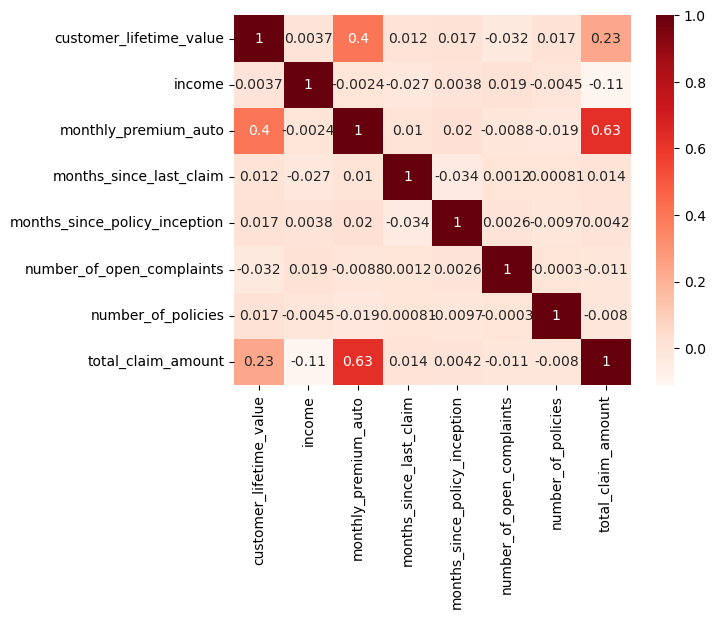

In [5]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

## X/Y Split

In [6]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

## Numerical/Categorical Split

In [7]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

C:\Users\kurtu\AppData\Local\Temp\ipykernel_12876\2358487290.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


In [8]:
numericalX.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

 ## Test/Train Split

In [9]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
2705,central,4786,no,basic,college,1/2/11,jan,employed,m,45515,...,10,33,0,9,personal auto,personal l3,offer2,call center,four-door car,medsize
2209,central,22445,no,basic,bachelor,2/28/11,feb,unemployed,f,80340,...,32,35,0,2,personal auto,personal l2,offer1,call center,four-door car,medsize
4004,west region,6412,no,extended,bachelor,1/2/11,jan,employed,m,58776,...,20,50,2,4,personal auto,personal l3,offer3,branch,four-door car,medsize


## Standardization

In [10]:
pt = PowerTransformer()

In [11]:
ct = ColumnTransformer([("pt", pt, list(numericalX.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [12]:
X_train = pd.DataFrame(X_train_ct)
X_test_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,0.649823,-0.633250,0.960690,0.582646,-0.033143,-0.502522,1.660057
1,-0.499110,0.552571,0.915092,0.415591,0.588851,-0.502522,-1.143833
2,-0.477937,0.364965,0.891527,-0.830609,0.557616,-0.502522,-1.143833
3,-0.664449,-1.480107,-1.453068,0.971550,1.070851,1.947236,0.513168
4,1.825591,-1.264602,-0.643882,0.971550,-0.428756,-0.502522,-0.063268
...,...,...,...,...,...,...,...
3202,0.510696,0.842343,-0.932776,-0.968850,0.103386,-0.502522,-0.063268
3203,0.543247,-0.936795,-0.513634,0.055807,-0.244875,-0.502522,-0.063268
3204,0.309956,1.331340,0.241171,1.328120,1.329338,-0.502522,1.311711
3205,-1.338693,0.817804,-0.513634,-0.243334,1.012270,2.046916,-1.143833


## OLS Modelling

In [13]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:05:49   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0

There is a significant relationship between dependent variable which is Total Claim Amount and two independent variables which are Income(t=-11.917, p<0.05) and Monthly premium auto(t=48.426, p<0.05).

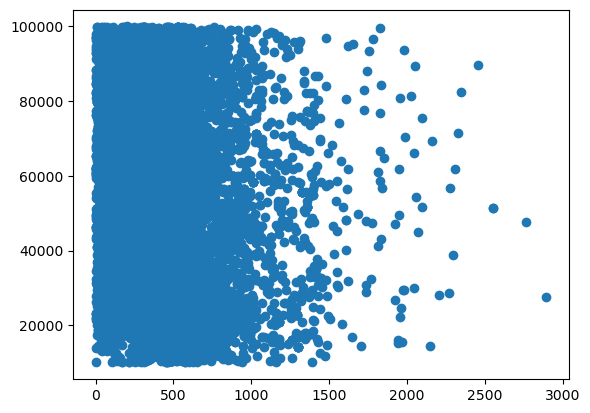

In [15]:
plt.scatter(y, numericalX['income'])
plt.show()
plt.title('Relationship between Total Claim Amount and Income')
plt.xlabel('Income')
plt.ylabel('Total Claim Amount')

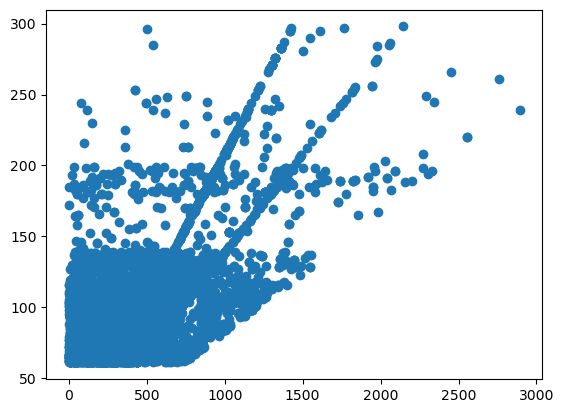

In [16]:
plt.scatter(y, numericalX['monthly_premium_auto'])
plt.show()
plt.title('Relationship between Total Claim Amount and Monthly ')
plt.xlabel('Income')
plt.ylabel('Total Claim Amount')